**Giang Pham**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 4a: Pandas and Principle Component Analysis

In [2]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import palettable 

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [8,8]})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_32971/2878839447.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_32971/2878839447.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


 

## Task 1:  Introduction to Pandas

We are going to be using Pandas, covariance matrices and principle component analysis to explore a dataset on breast cancer diagnosis data. More information about the dataset can be found [here.](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv 
2. Using the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation:
    1. In one method call get the shape and print the results.
    2. To get the column headers and print them.
    3. In one method call get the first 5 items and print the results.
    4. Find the mean of each column
3. Create a `cancer_x` dataframe which includes columns 2-11 (radius_mean - fractal_dimension_mean).
4. Update `cancer_x` to be normalized from 0-1, by subtracting by the minimum and dividing by the range. 
5. Create a `cancer_y` series with from the column `diagnosis` and set it to be [lowercase](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.capitalize.html)


In [3]:
url= "https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
data = pd.read_csv("data.csv", delimiter=",", skip_blank_lines=True)
print("data shape: ", data.shape)
print("headers: \n", data.columns)
print("head: \n", data.head(5))
print("mean of each col: \n", data.mean(axis = 0))

data shape:  (569, 32)
headers: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
head: 
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     12

/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_32971/2305749701.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("mean of each col: \n", data.mean(axis = 0))


In [4]:
#CANCER X
field_x = [i for i in range(2,12)]
cancer_x = pd.read_csv("data.csv", usecols=field_x)
print("cancer_x shape, \n", cancer_x.shape)
print("cancer_x headers: \n", cancer_x.columns)

#normalize cancer_x
cancer_x_range = cancer_x.max(axis = 0) - cancer_x.min(axis = 0)
cancer_x_norm = (cancer_x - cancer_x.min(axis = 0))/cancer_x_range
print("cancer_x_norm values: \n", cancer_x_norm.head(5))

cancer_x shape, 
 (569, 10)
cancer_x headers: 
 Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
cancer_x_norm values: 
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.4310

In [5]:
#CANCER Y 
diagnosis = data["diagnosis"]
cancer_y = pd.Series(diagnosis)
cancer_y= cancer_y.str.lower()
print(cancer_y)

0      m
1      m
2      m
3      m
4      m
      ..
564    m
565    m
566    m
567    m
568    b
Name: diagnosis, Length: 569, dtype: object


## Task 2: Create and Visualize a Covariance Matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the pairwise covariance of the `cancer_x` columns, store the resulting covariance matrix, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        1. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a [colorbar](https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html).
    
**Question:** What interpretations can you draw from this covariance matrix?

**Answer:** There are not a lot of strong correlations between any pair of variable. The max correlation I could find is about 0.03.

Center_x covariance shape: (10, 10)
                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                0.027818      0.007855        0.027946   0.024582   
texture_mean               0.007855      0.021156        0.008048   0.006972   
perimeter_mean             0.027946      0.008048        0.028195   0.024727   
area_mean                  0.024582      0.006972        0.024727   0.022283   
smoothness_mean            0.003612     -0.000432        0.004419   0.003355   
compactness_mean           0.013675      0.005577        0.015149   0.012054   
concavity_mean             0.021083      0.008216        0.022461   0.019127   
concave points_mean        0.026458      0.008232        0.027558   0.023701   
symmetry_mean              0.003412      0.001438        0.004255   0.003127   
fractal_dimension_mean    -0.007729     -0.001653       -0.006529  -0.006284   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius

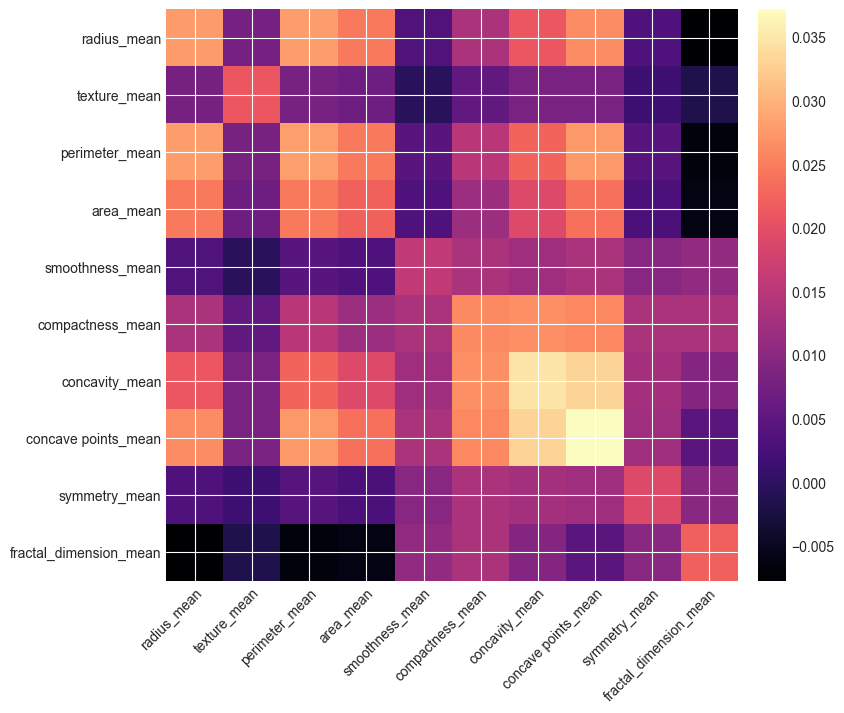

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cancer_x_cov = cancer_x_norm.cov()
print("Center_x covariance shape:", cancer_x_cov.shape)
print(cancer_x_cov)

n = cancer_x_cov.shape[0] 
cancer_x_headers = cancer_x_cov.columns
fig,ax = plt.subplots()

im = ax.imshow(cancer_x_cov, cmap = "magma")

ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))

# label them with the respective list entries
ax.set_xticklabels(cancer_x_headers)
ax.set_yticklabels(cancer_x_headers)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

plt.colorbar(im, cax=cax)
plt.show()


## Task 3: Visualizing Principle Component Analysis

### 3a) Principle Component Analysis
1. Use [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) to compute the eigenvalues and right eigenvectors of the covariance matrix.  
1. Print the eigen_values and the first 2 eigenvectors.
2. Transform the data with the eigen_vectors.
    1. Matrix multiply cancer_x with the first two columns of the eigen_vectors. 
    2. Print the first 5 rows of the transformed data.

**Question:**  Which 2 variables are the first eigenvector most dependent on?  How does that relate to the heatmap?

**Answer:** It is concave points_mean and concavity_mean. They have the strongest covariance value.  

In [7]:
eigvals, eigvecs = np.linalg.eig(cancer_x_cov)
print("Eigenvalues: \n", eigvals)
print("First 2 eigenvectors: \n", eigvecs[:,:2])

cancer_x_transformed = cancer_x_norm @ eigvecs[:,:2]
print("Transformed data: \n", cancer_x_transformed[:5])

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868
-----------------------------------
''')

Eigenvalues: 
 [0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121
 0.00206]
First 2 eigenvectors: 
 [[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data: 
           0         1
0 -1.692053 -0.746755
1 -1.105772  0.158411
2 -1.479314 -0.159259
3 -1.335070 -1.286536
4 -1.364975 -0.036868

-----------------------------------
Your results should look like this:
-----------------------------------
Eigen values: 
[0.15632 0.05609 0.01875 0.01012 0.00688 0.00348 0.00001 0.00027 0.00121 0.00206]
First 2 Eigen vectors: 
[[-0.36654  0.33267]
 [-0.1315   0.11754]
 [-0.38051  0.30003]
 [-0.32796  0.28817]
 [-0.16268 -0.33468]
 [-0.34395 -0.32018]
 [-0.43907 -0.17375]
 [-0.47861 -0.04037]
 [-0.16356 -0.34204]
 [-0.05141 -0.58234]]
Transformed data:
           0         1
0 -1.692053 -0.746755
1 -1.105772

### 3b) Graph a scatterplot of the transformed data

Graph a scatterplot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html) using mpatches.
    1. Create 1 patch with the color `m` for malignant
    1. Create 1 patch with the color `b` for benign

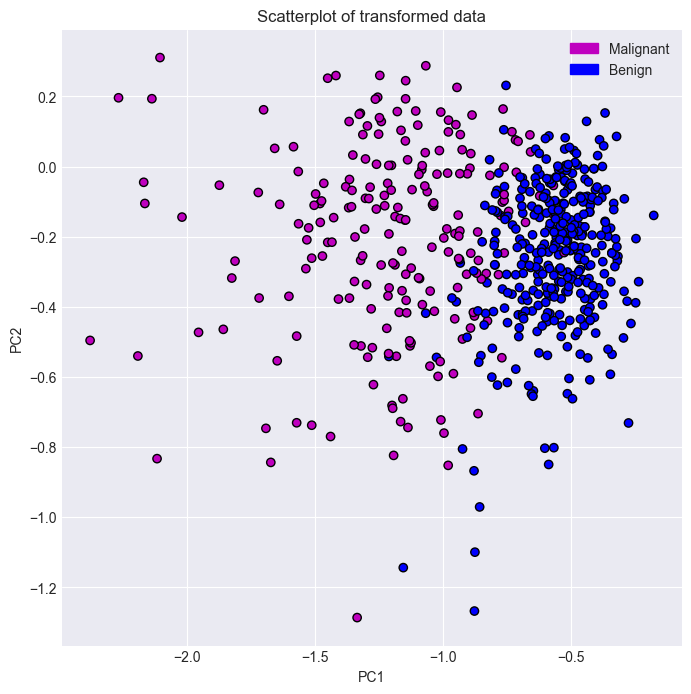

In [11]:
import matplotlib.patches as mpatches
pc1 = cancer_x_transformed.iloc[:,0]
pc2 = cancer_x_transformed.iloc[:,1]
plt.scatter(pc1, pc2, c = cancer_y, edgecolors="black")

# Add title and axis labels
plt.title("Scatterplot of transformed data")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Create custom legend
m_patch = mpatches.Patch(color='m', label='Malignant')
b_patch = mpatches.Patch(color='b', label='Benign')
plt.legend(handles=[m_patch, b_patch])

plt.show()